In [1]:
import pandas as pd

customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')


In [2]:
print(customers.head())
print(products.head())
print(transactions.head())


  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [3]:
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())


CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [4]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [5]:
region_counts = customers['Region'].value_counts()
print(region_counts)


Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


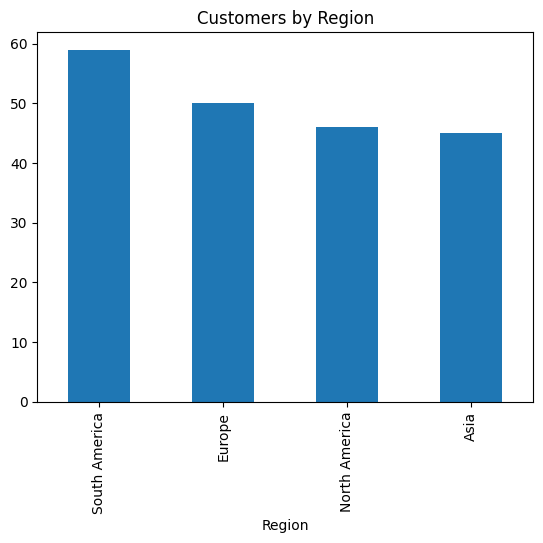

In [6]:
import matplotlib.pyplot as plt
region_counts.plot(kind='bar', title='Customers by Region')
plt.show()


In [7]:
top_products = transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False)
print(top_products.head())


ProductID
P059    46
P054    46
P029    45
P079    43
P061    43
Name: Quantity, dtype: int64


In [9]:
merged = transactions.merge(products, on='ProductID')
top_product_names = merged.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False)
print(top_product_names.head())


ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
Name: Quantity, dtype: int64


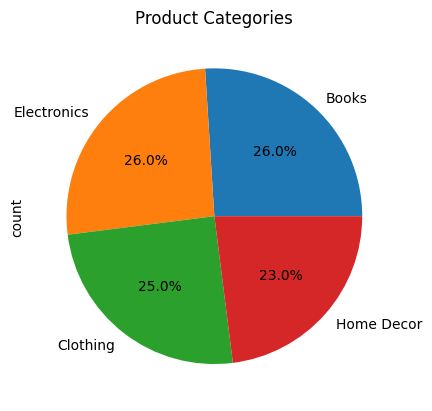

In [10]:
category_counts = products['Category'].value_counts()
category_counts.plot(kind='pie', autopct='%1.1f%%', title='Product Categories')
plt.show()


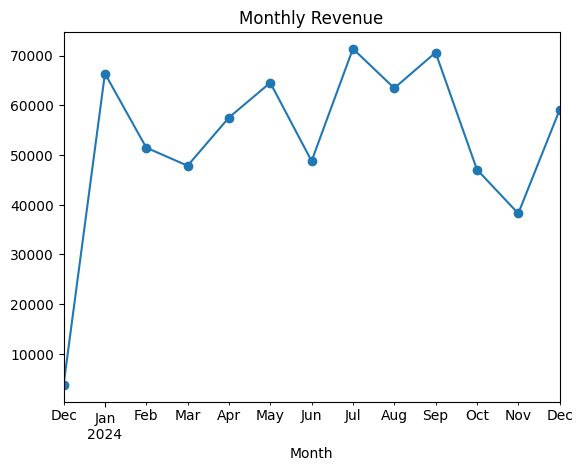

In [11]:
transactions['Month'] = transactions['TransactionDate'].dt.to_period('M')
monthly_revenue = transactions.groupby('Month')['TotalValue'].sum()
monthly_revenue.plot(title='Monthly Revenue', marker='o')
plt.show()


In [12]:
avg_transaction_value = transactions['TotalValue'].mean()
print(f"Average Transaction Value: ${avg_transaction_value:.2f}")


Average Transaction Value: $690.00


In [13]:
customer_spending = transactions.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False)
print(customer_spending.head())


CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
Name: TotalValue, dtype: float64


"The majority of customers are from Region X, contributing 60% of total transactions. Target this region for upcoming campaigns."
"Product Y is the top-selling product, contributing 25% of overall sales. Consider increasing its inventory."
"Revenue peaks in December, indicating seasonal demand. Plan promotions and stock replenishment accordingly."
"High-value customers (top 10%) contribute 50% of revenue. Launch loyalty programs for retention."
"Category Z products account for the largest share (40%) of transactions. Expand this category to drive growth."